# AVOCADO CASE STUDY

## Importing important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Sometime python script show warning to avoid that this is imported

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import plotly.express as px

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Description

#####  Case Study
Problem Statement: 

###### Content

This dataset is having 5 columns including dependent and independent columns, We are building predictive model which will be able to predict targets based on the given features.

Some relevant columns in the dataset:

Target - this is dependent columns, our model will predict this column value

Feature1 - first independent column

Feature2 - second independent column

Feature3 - third independent column

Feature4 - fourth independent column


Inspiration /Label 

As we can see, target column is having descrete class label, therefore this is classification label


## Importing DataSet

In [ ]:
df = pd.read_csv('/Users/bhushansharma/Downloads/NITS Solutions India Private Limited_Data Scientist_DataSet.csv')
df.shape  # dataset shape

(61045, 5)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize display of the rows
pd.set_option('display.max_columns', None)  # to maximize display of the columns

In [4]:
df.head()  # top 5 rows

target    feature1    feature2    feature3  feature4
0     3.0   98.693792  282.271563   66.843083      19.0
1     5.0  667.546946  229.514699 -232.033562      18.0
2     5.0   14.562982  259.189071  101.628816      19.0
3     0.0  -38.394727  265.754566  120.453983      11.0
4     1.0  274.565713  372.799317   25.642173      14.0

In [5]:
df.sample(4)   # 4 random column

target    feature1    feature2    feature3  feature4
25050     0.0  -50.343903  304.766159  158.671439      15.0
3539      0.0  194.267003  268.780197    8.251588      17.0
24074     3.0  -67.092311  346.947414  186.385511      17.0
57012     3.0 -200.383855  375.040983  240.409891      10.0

In [6]:
df.tail()      # 5 bottom rows

target    feature1    feature2    feature3  feature4
61040     0.0 -655.826944  405.475210  505.361210      16.0
61041     0.0 -127.781859  283.138246  170.418409      16.0
61042     4.0  776.839452  259.999254 -281.433787      16.0
61043     4.0 -555.065284  196.616747  344.870505      19.0
61044     0.0  168.249405  458.185785  123.348823      17.0

## Information about dataset

In [7]:
df.info()  # All column is of float type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61045 entries, 0 to 61044
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    61038 non-null  float64
 1   feature1  61045 non-null  float64
 2   feature2  61045 non-null  float64
 3   feature3  60913 non-null  float64
 4   feature4  61029 non-null  float64
dtypes: float64(5)
memory usage: 2.3 MB


In [ ]:
# Even target column is also is of float type therefore we need to check its unique values to confirm this is classification problem or regression problem

In [9]:
df.dtypes  # Data type of columns

target      float64
feature1    float64
feature2    float64
feature3    float64
feature4    float64
dtype: object

## Checking Null Values

In [10]:
df.isnull().sum().sum()  
# 155 Null values are present in the dataset

155

<Axes: >

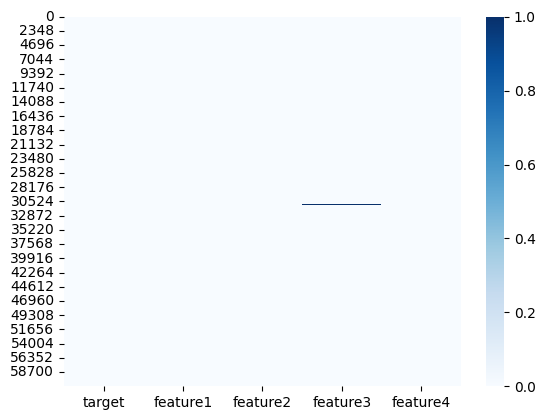

In [11]:
sns.heatmap(df.isnull(), cmap = 'Blues')  # Graphical representation of Non null dataset

## Data Preprocessing

In [12]:
df.head(2)

target    feature1    feature2    feature3  feature4
0     3.0   98.693792  282.271563   66.843083      19.0
1     5.0  667.546946  229.514699 -232.033562      18.0

In [ ]:
df['target'].unique()
# We can see, model is having 5 classification of data and other is nan
# We can convert this into int column. before it

array([ 3.,  5.,  0.,  1.,  4., nan])

In [ ]:
# According to me, we can impute value and can try the algorithm output but it is not good to impute values in target column, therefore it is good to delete directly. because missing entries of target column is also less.

In [15]:
df.isnull().sum() 

target        7
feature1      0
feature2      0
feature3    132
feature4     16
dtype: int64

In [16]:
null_value_per = df.isnull().sum() / df.shape[0] * 100
null_value_per

# If we delete nan record of target and feature4 column then we are not geting high data loss, Therefore we can delete nan record of target and feature4 column

target      0.011467
feature1    0.000000
feature2    0.000000
feature3    0.216234
feature4    0.026210
dtype: float64

In [17]:
df.shape

(61045, 5)

In [18]:
df = df.dropna(subset = ['target', 'feature4'])
df.shape

# now we have new dataset where 0 value is nan in target & feature4 columns

(61022, 5)

In [19]:
null_value_per = df.isnull().sum() / df.shape[0] * 100
null_value_per

# If we delete nan record of target column then we are not geting high data loss, Therefore we can delete nan record of target column

target      0.000000
feature1    0.000000
feature2    0.000000
feature3    0.216315
feature4    0.000000
dtype: float64

In [20]:
# We go delete record approach only when are not getting high data loss, because imputing values are just our prediction based on centeral tendeancy, and that can leads to less accurate model. 

# Now we have feature3 column where 0.2 percent values are nan, which is also not a high number and we can apply centeral tendency imputating process and accordingly we will fiinalize the things

In [21]:
#
for i in df.columns:
    plt.figure(figsize = (3, 3))
    fig = px.box(df,y=i)
    fig.show()
    

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [22]:
# "nan" values process with measure of central tendency

In [23]:
missing_var_name = [var for var in df.columns if df[var].isnull().sum() > 0]
missing_var_name
# now, we have only feature3 column with nan values
# Max value of feature3 is 1030 and min value of feature3 is -684
# Let try measure of central tendency, and can see distribution difference we are getting by imputing values. 

['feature3']

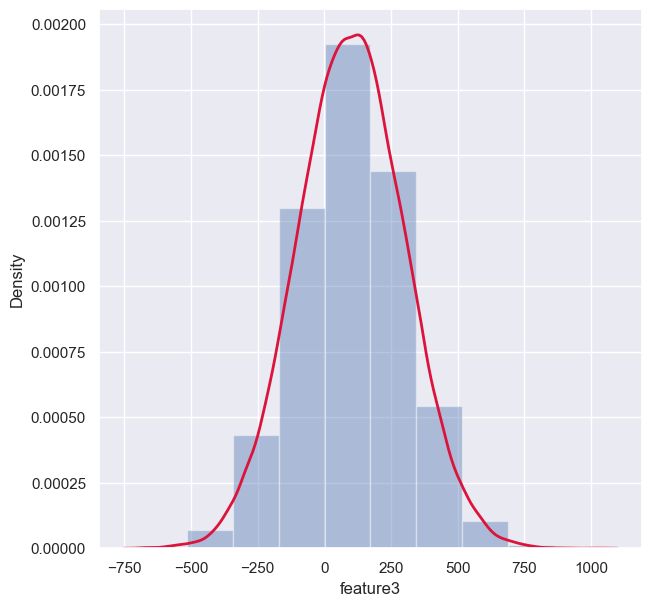

In [24]:
plt.figure(figsize = (7, 7))
sns.set()

for i, var in enumerate(missing_var_name):
    plt.subplot(1, 1, i+1)    
    sns.distplot(df[var], bins = 10, kde_kws = { 'linewidth' : 2, 'color' : '#DC143C'})

    # distplot is going to replecate with histplot but now its working , therefore i have used it
    # This column data distribution is bell shaped curve

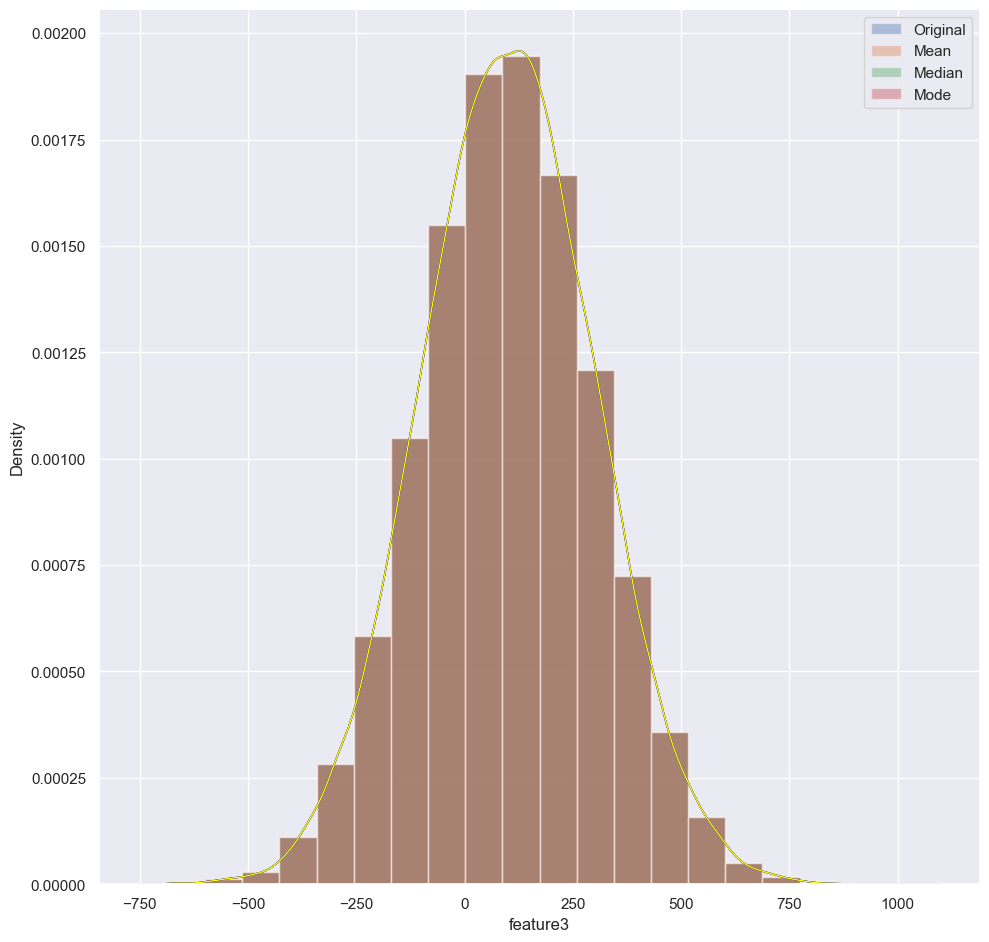

In [25]:
plt.figure(figsize = (25, 25))
sns.set()

for i, var in enumerate(missing_var_name):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[var], bins = 20, kde_kws = {'linewidth' : 1, 'color' : 'red' }, label = "Original")
    sns.distplot(df[var], bins = 20, kde_kws = {'linewidth' : 1, 'color' : 'green' }, label = 'Mean')
    sns.distplot(df[var], bins = 20, kde_kws = {'linewidth' : 1, 'color' : 'blue' }, label = 'Median')
    sns.distplot(df[var], bins = 20, kde_kws = {'linewidth' : 1, 'color' : 'yellow' }, label = 'Mode')
    plt.legend()

In [26]:
# We can see, are not getting difference in data distribution in any measures, because missing entry count is not high therefore it is seems as similary. 
# No we can go with median value imputions.
df['feature3'] = df['feature3'].fillna(df['feature3'].median())

In [27]:
df.head()

target    feature1    feature2    feature3  feature4
0     3.0   98.693792  282.271563   66.843083      19.0
1     5.0  667.546946  229.514699 -232.033562      18.0
2     5.0   14.562982  259.189071  101.628816      19.0
3     0.0  -38.394727  265.754566  120.453983      11.0
4     1.0  274.565713  372.799317   25.642173      14.0

In [28]:
null_value_per = df.isnull().sum() / df.shape[0] * 100
null_value_per

# Now, all nan values has been treated. 

target      0.0
feature1    0.0
feature2    0.0
feature3    0.0
feature4    0.0
dtype: float64

In [29]:
df['target'] = df['target'].astype('int')  # As we can see this is a classification problem therefore i have converted to int from float for easy processing

In [30]:
float_col =  df.select_dtypes(include = ['float']).keys()  # all float64 dtype columns
float_col

Index(['feature1', 'feature2', 'feature3', 'feature4'], dtype='object')

In [31]:
df.dtypes

target        int64
feature1    float64
feature2    float64
feature3    float64
feature4    float64
dtype: object

In [ ]:
# categorical columns
cat_col =  df.select_dtypes(include = ['int64', 'object']).keys()  

Index(['target'], dtype='object')

#### For categorical Features

In [33]:
for i in cat_col:
    print('__________________________________',i,'______________________________________')
    print(df[i].value_counts()  )

__________________________________ target ______________________________________
3    12412
1    12266
4    12224
5    12169
0    11951
Name: target, dtype: int64


In [ ]:
for i in cat_col:
    print(i, ' column, have unique value : ', df[i].nunique())


target  column, have unique value :  5


### Target column

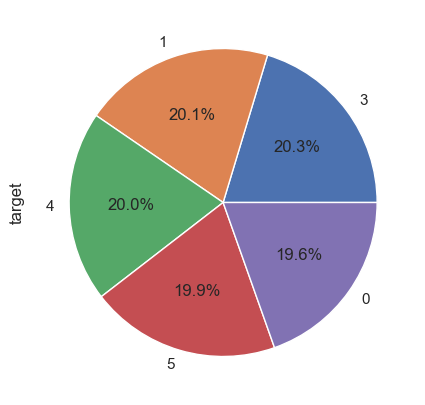

In [35]:
for i in cat_col:
    plt.figure(figsize = (5, 5))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')
# data is balanced

In [36]:
# Note: There is no object type columns, where we can perform counplot analysis.


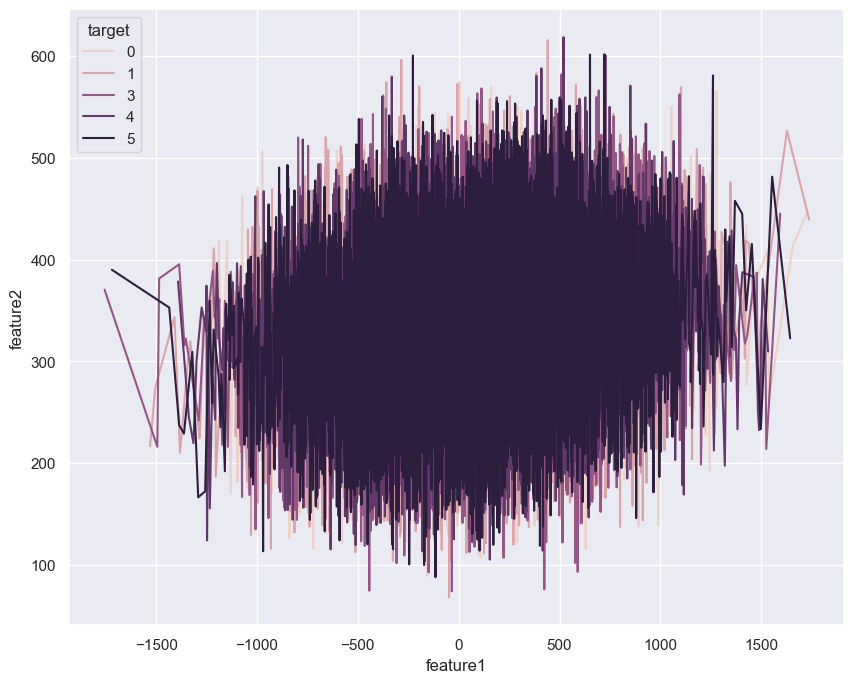

In [37]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature1', y = 'feature2', data = df, hue = 'target')
plt.show()

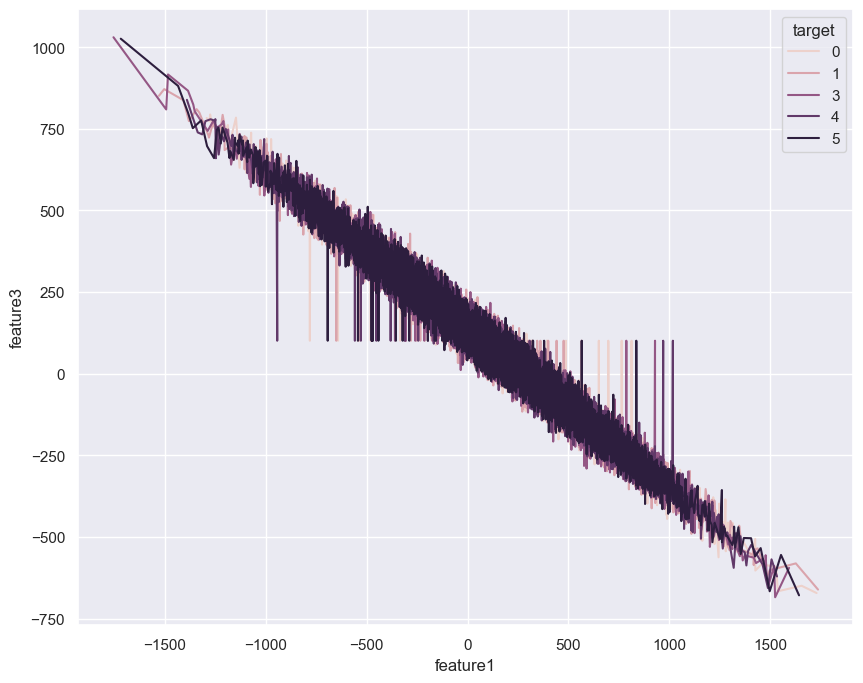

In [38]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature1', y = 'feature3', data = df, hue = 'target')
plt.show()

In [ ]:
# feature 1 and feature4 is having regression relation.

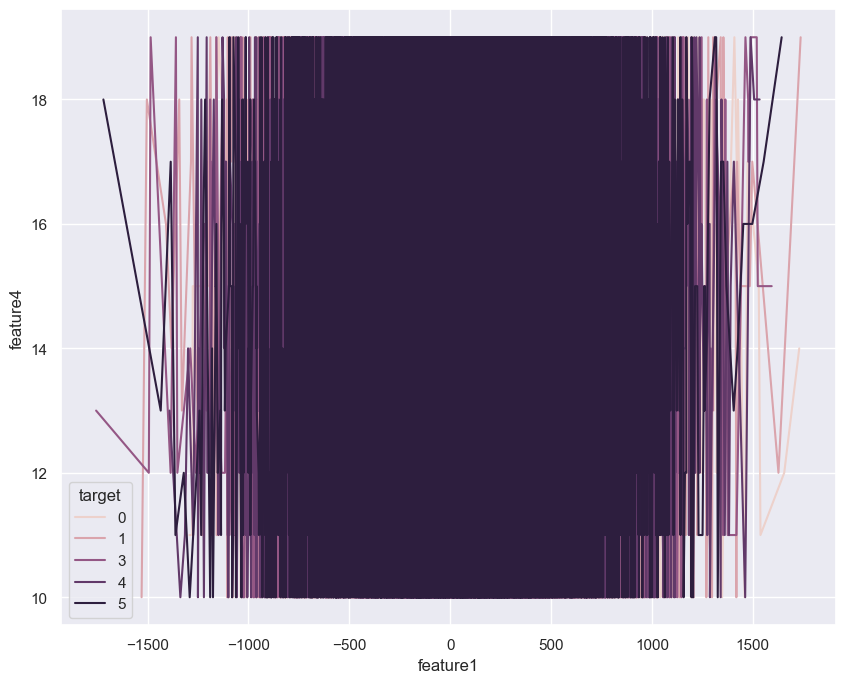

In [39]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature1', y = 'feature4', data = df, hue = 'target')
plt.show()

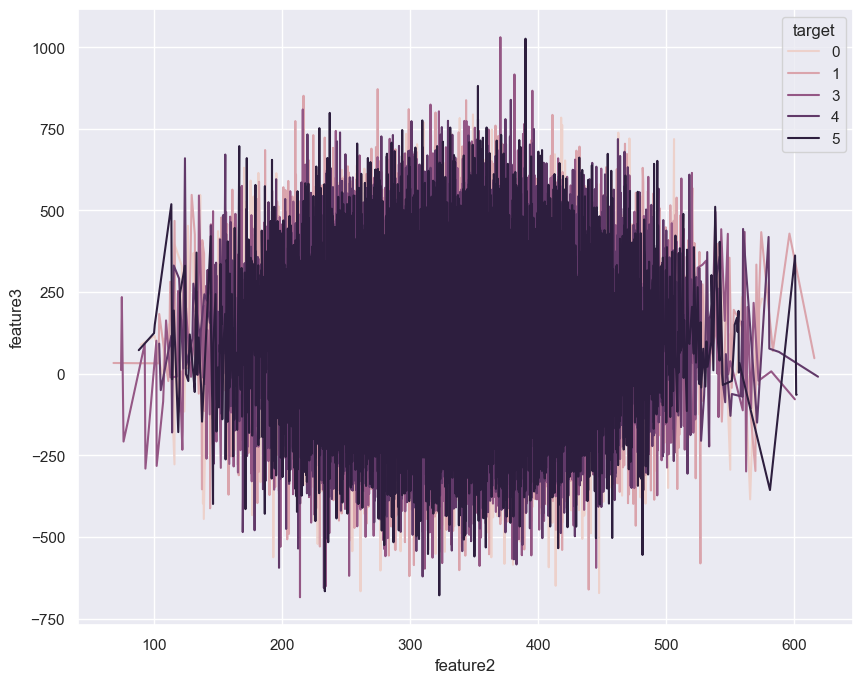

In [40]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature2', y = 'feature3', data = df, hue = 'target')
plt.show()

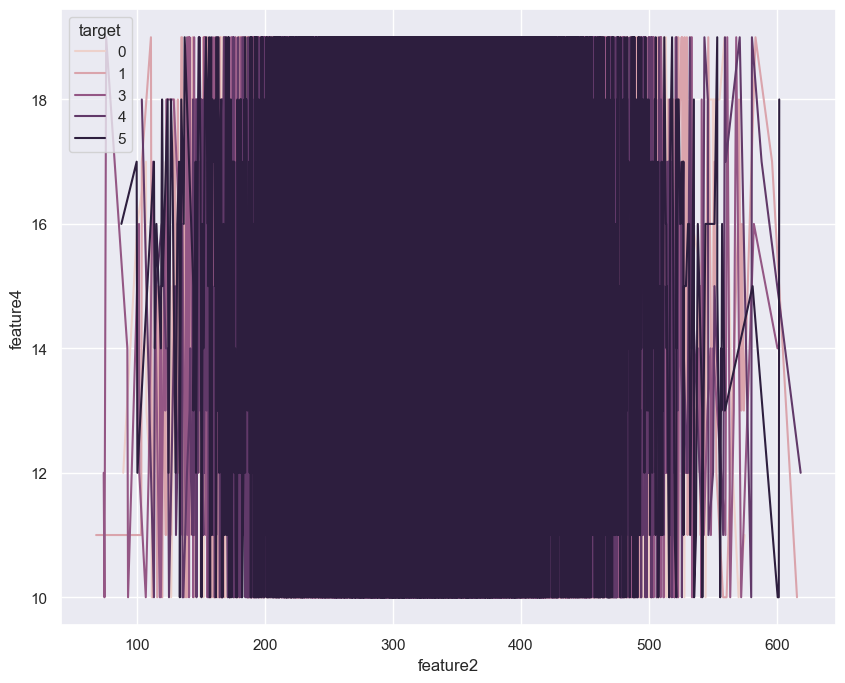

In [41]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature2', y = 'feature4', data = df, hue = 'target')
plt.show()

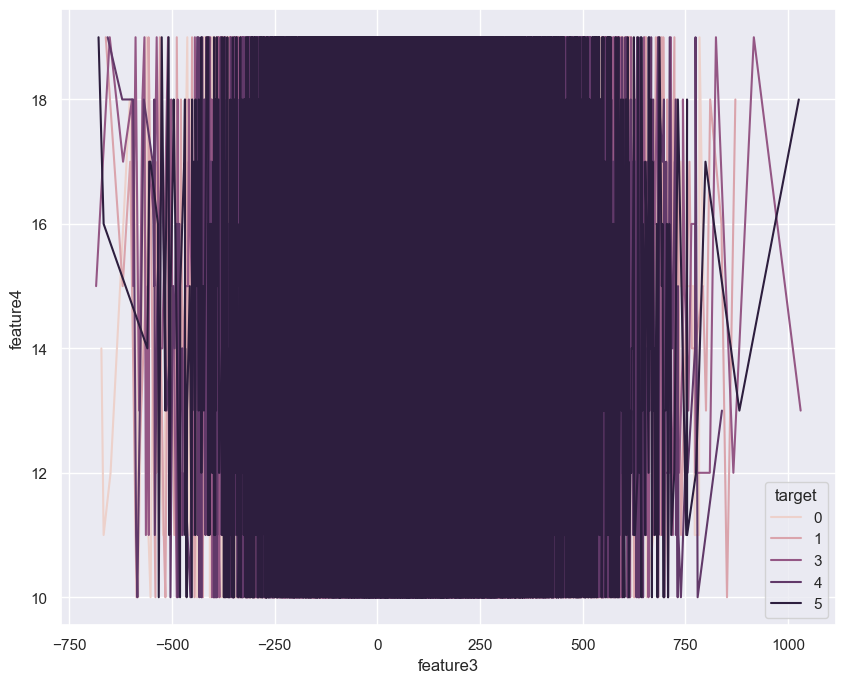

In [42]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature3', y = 'feature4', data = df, hue = 'target')
plt.show()

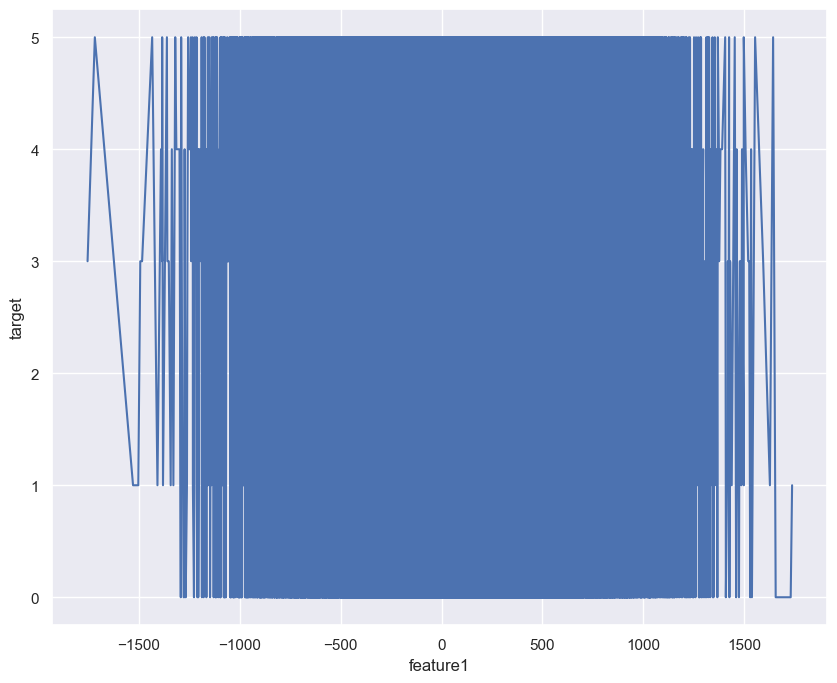

In [43]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature1', y = 'target', data = df)
plt.show()

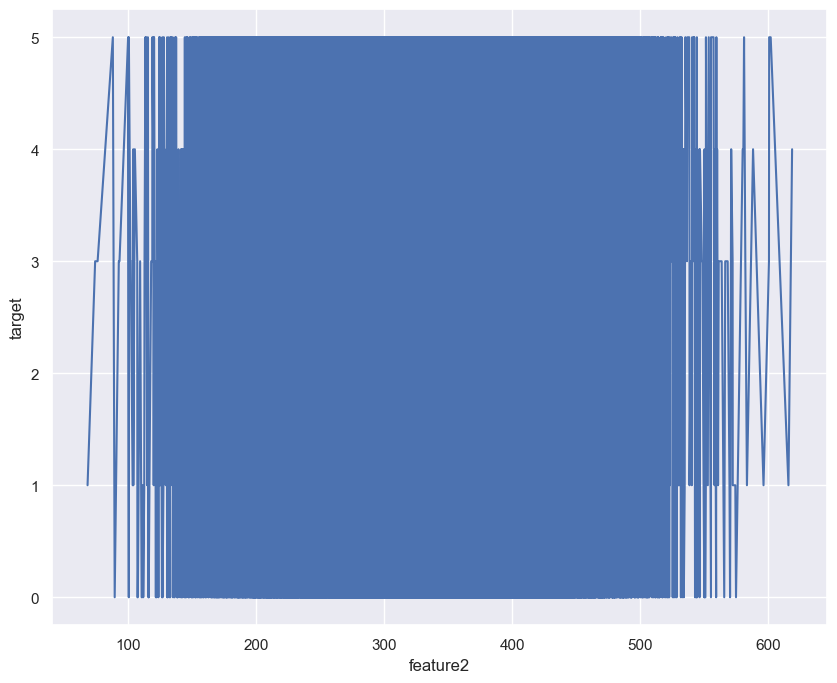

In [44]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature2', y = 'target', data = df)
plt.show()

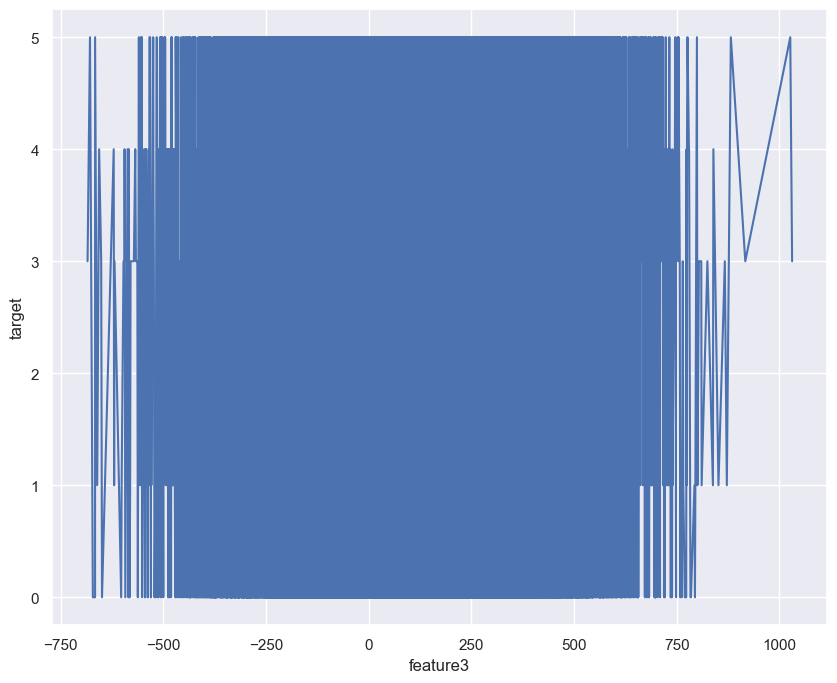

In [45]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature3', y = 'target', data = df)
plt.show()

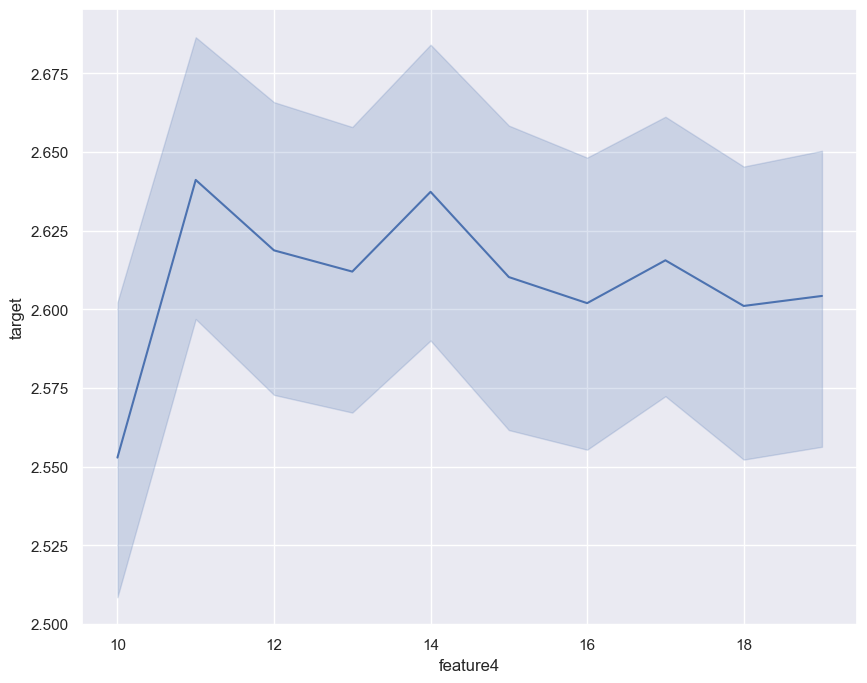

In [46]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'feature4', y = 'target', data = df)
plt.show()

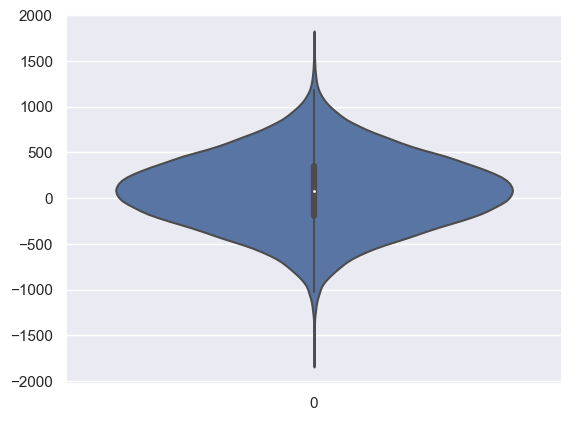

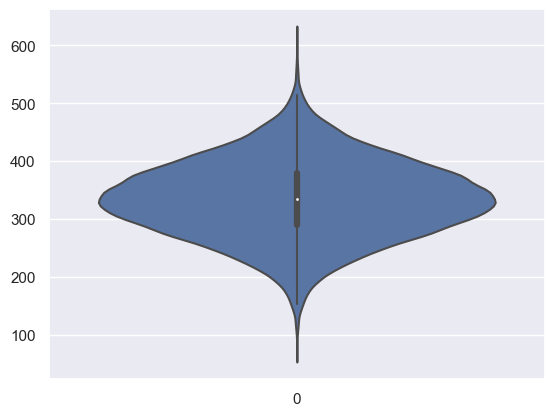

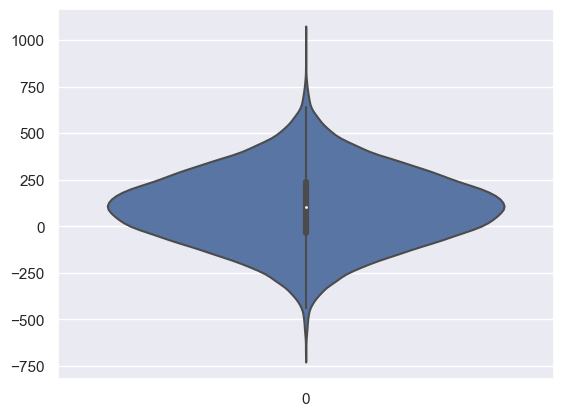

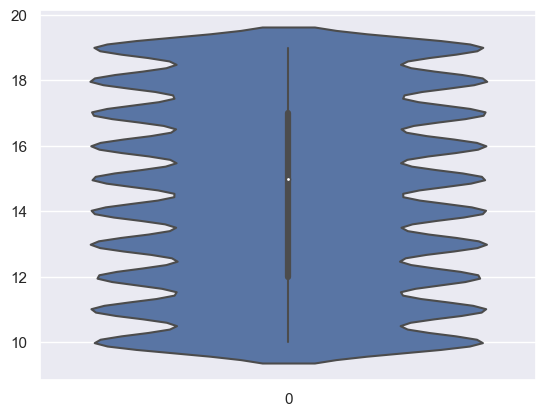

In [47]:
for i in float_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

### Correlation of the columns

In [48]:
df.corr()

target  feature1  feature2  feature3  feature4
target    1.000000 -0.004064  0.003719  0.004651  0.000990
feature1 -0.004064  1.000000  0.167365 -0.983977  0.023391
feature2  0.003719  0.167365  1.000000 -0.002497 -0.002600
feature3  0.004651 -0.983977 -0.002497  1.000000 -0.001699
feature4  0.000990  0.023391 -0.002600 -0.001699  1.000000

<Axes: >

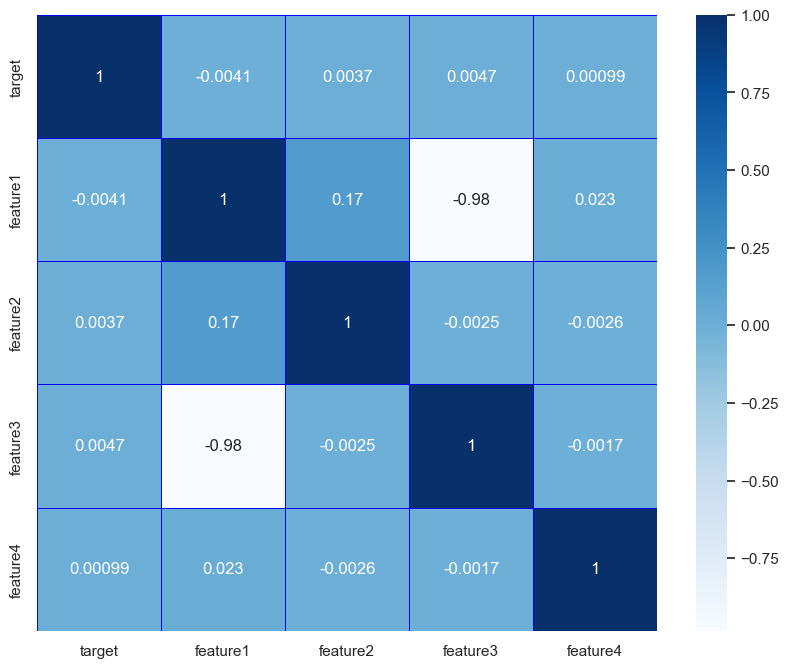

In [49]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [ ]:
# feature 1 and 3 are showing negative regression

### Describe Data

In [51]:
df.describe()

target      feature1      feature2      feature3      feature4
count  61022.000000  61022.000000  61022.000000  61022.000000  61022.000000
mean       2.609600     78.024921    334.549330    101.147627     14.508931
std        1.847244    407.551828     67.279821    200.379322      2.869557
min        0.000000  -1755.094888     68.202629   -684.850306     10.000000
25%        1.000000   -196.800976    289.439672    -33.921614     12.000000
50%        3.000000     78.880751    334.271956    101.027466     15.000000
75%        4.000000    353.181550    379.723929    235.570081     17.000000
max        5.000000   1737.373411    618.453382   1030.735499     19.000000

<Axes: >

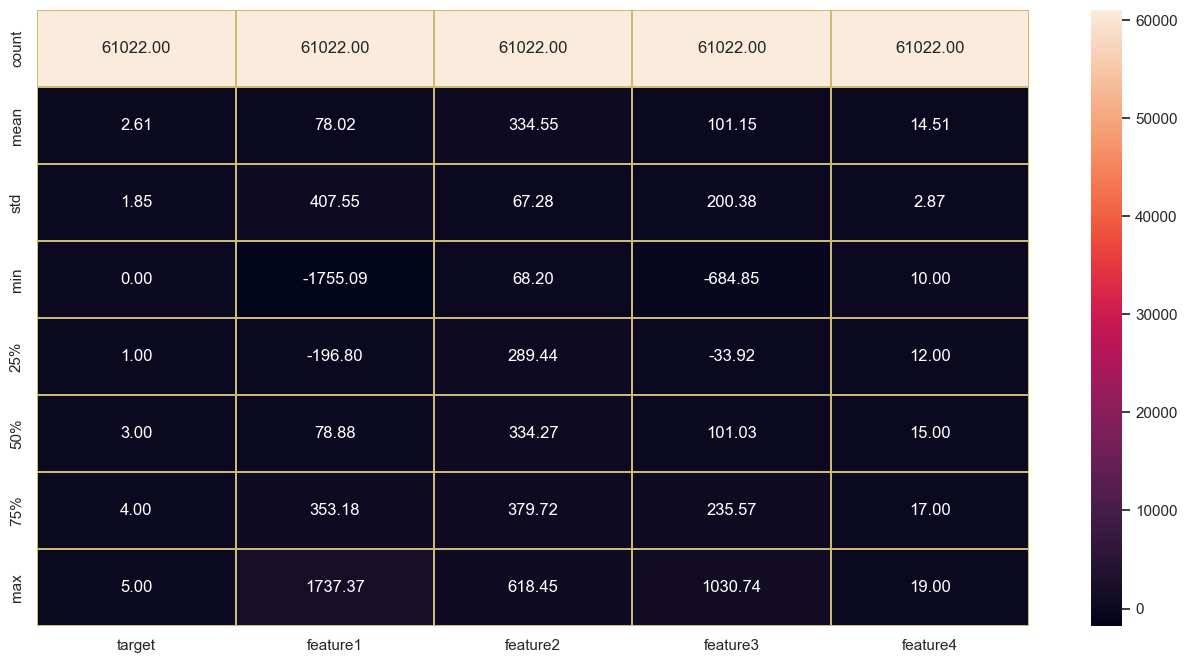

In [52]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

### Checking the columns contribution to predict target

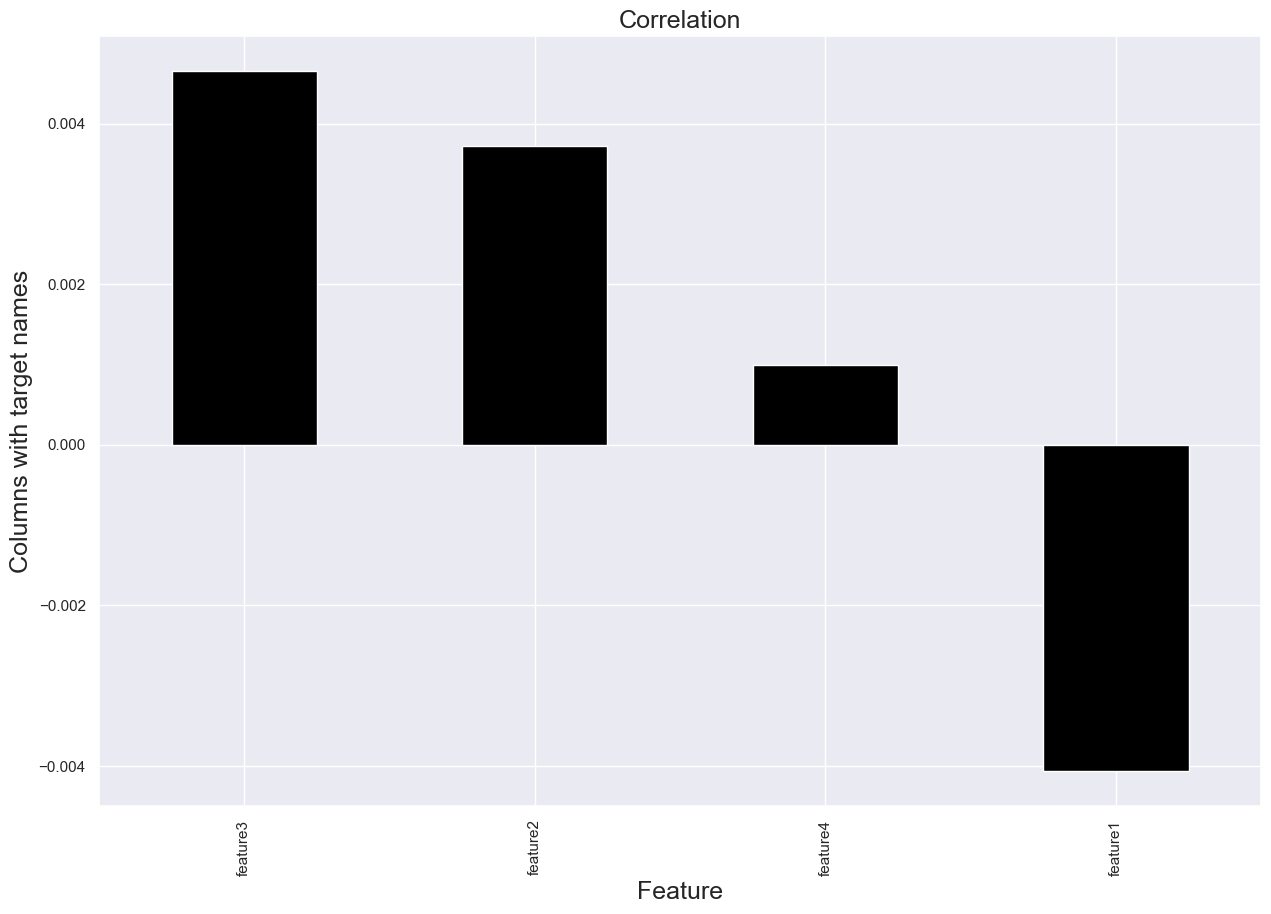

In [54]:
plt.figure(figsize = (15, 10))
df.corr()['target'].sort_values(ascending = False).drop(['target']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [ ]:
# feature 3 and feature 1 are showing positive and negative corration to target column respectivly 

### Outlier Removing Techniques

#### 1. Try zscore technique

In [58]:
df1 = df.copy()
df.shape

(61022, 5)

In [59]:
from scipy.stats import zscore

In [60]:
z = np.abs(zscore(df1) )
df1_z = df1[(z < 3).all(axis = 1)] 
df1_z.shape

# (0, 81)

(60638, 5)

In [ ]:
(df.shape[0] - df1_z.shape[0] ) / df.shape[0]

# 0.006  (100 percent data loss we are getting by this method)

0.0062928124283045455

In [62]:
# We are getting so high data loss, therefore we can not consider this technique for removing outliers

In [63]:
df2 = df.copy()

#### 2. IQR Technique

In [64]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1 

In [65]:
df1_IQR = df2[~((df2 < (Q1 - 1.5*IQR) ) | (df2 > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df1_IQR.shape 
# (0, 81)

(60067, 5)

In [66]:
(df.shape[0] - df1_IQR.shape[0] ) / df.shape[0]

#  1.0  (100 percent data loss we are getting by this method)

0.015650093408934484

In [ ]:
# Considering zscore approach because it is leading less data loss

df1 = df1_z.copy()
df1.shape

(60638, 5)

### Seperating dataset into x1 and y1 form

In [68]:
x1 = df1.drop(columns= ['target'])
y1 = df1['target']

print('shape of test', x1.shape)
print('shape of y', y1.shape)

shape of test (60638, 4)
shape of y (60638,)


In [69]:
x1.dtypes

feature1    float64
feature2    float64
feature3    float64
feature4    float64
dtype: object

### Removing Skewness

In [70]:
x1.skew()

feature1   -0.013099
feature2   -0.008781
feature3    0.011987
feature4   -0.006370
dtype: float64

In [74]:
# These are close to 0, so the skewness for these features is very low and the data is roughly symmetric.
# But still we can apply powertransformation , log, sqrt etc transformation to remove skewness, now these skewness is in exceptable range
skewed_col = ['feature1', 'feature2', 'feature3', 'feature4']

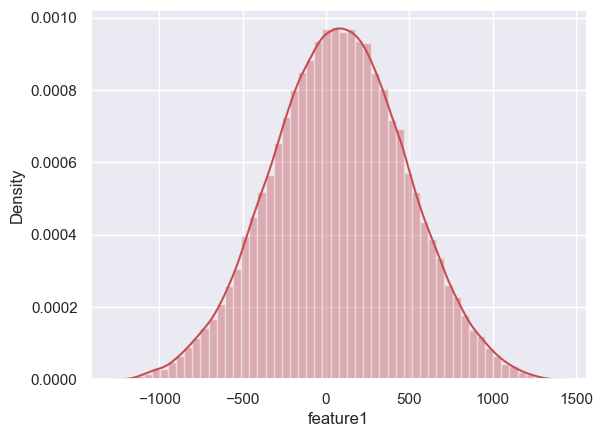

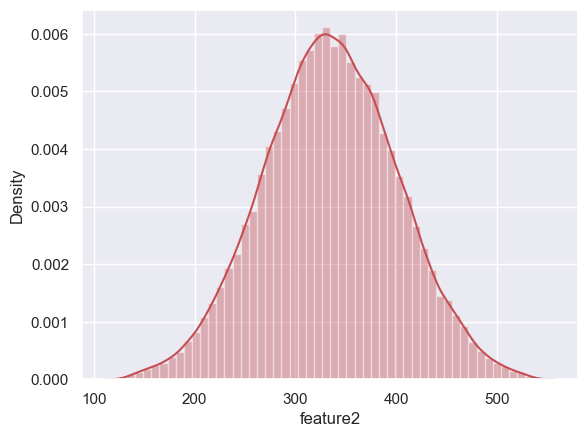

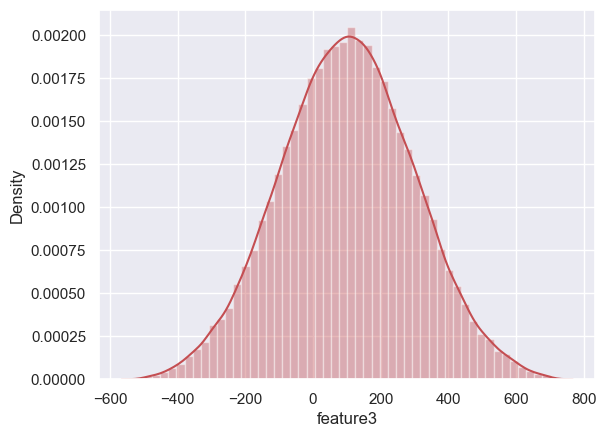

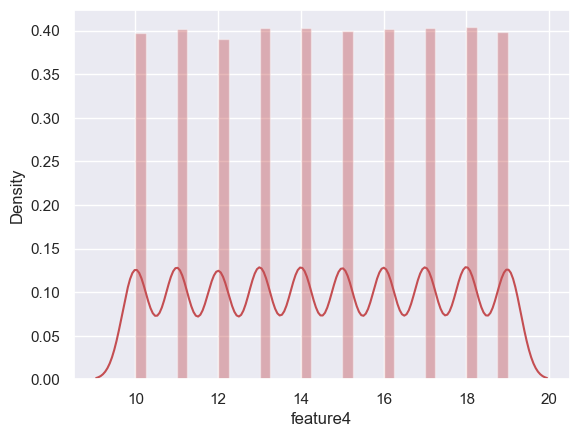

In [75]:
for i in skewed_col:
    plt.figure()
    sns.distplot(x1[i], color = 'r')

### Vetting of MultiColinearity 

##### Using VIF Technique

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [78]:
cal_vif(x1)

Columns Name         VIF
0     feature1  191.129425
1     feature2  110.949875
2     feature3  227.327825
3     feature4   13.544158

<Axes: >

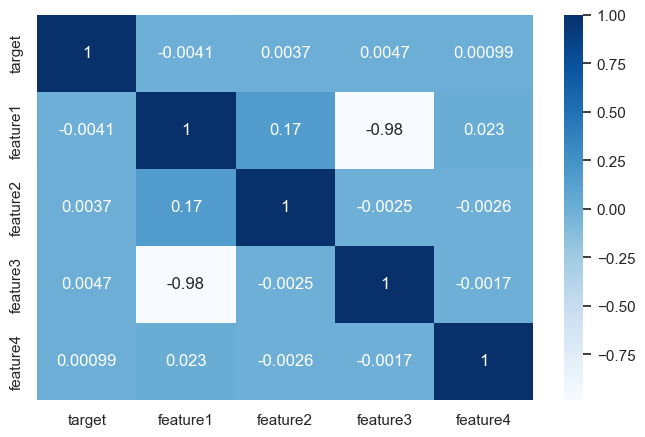

In [79]:
plt.figure(figsize = (8, 5))  
sns.heatmap(df.corr(), cmap ='Blues', annot = True) 

In [80]:
# feature1: 233.87: This is very high and indicates severe multicollinearity with other features. This is a red flag and suggests that feature1 is highly correlated with other features, potentially making the regression model unstable.

# feature2: 7.40: This is moderately high, suggesting some multicollinearity but not necessarily severe.

# feature3: 227.22: Like feature1, this is also very high, indicating a high degree of multicollinearity with other features.

# feature4: 1.12: This is very low, indicating no significant multicollinearity for this feature.

In [81]:
# As we are having only 4 columns and 2 of them are showing high VIF, therefore, we will apply PCA technique to reduce this issue

## PCA 

In [82]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# x_scaler = ss.fit_transform(x1)
# x1 = pd.DataFrame(x_scaler, columns = x1.columns)

In [83]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x1)

# Step 2: Apply PCA
pca = PCA(n_components=3)  # Choose the number of components
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame for easier viewing
pca_x = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2','PCA3'])

# Show the explained variance
print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.49960532 0.2507323  0.24912987]


In [84]:
pca_x.head()

PCA1      PCA2      PCA3
0 -0.087201  1.698072  0.459650
1 -2.048105  2.120571 -0.563573
2  0.225908  1.913131  0.231928
3  0.417570 -0.219887 -1.563321
4 -0.679221 -0.478552  0.244800

In [85]:
cal_vif(pca_x)

Columns Name  VIF
0         PCA1  1.0
1         PCA2  1.0
2         PCA3  1.0

In [135]:
x = x1[['feature2', 'feature4']]
x.head()

feature2  feature4
0  282.271563      19.0
1  229.514699      18.0
2  259.189071      19.0
3  265.754566      11.0
4  372.799317      14.0

In [136]:
df.describe()

target      feature1      feature2      feature3      feature4
count  61022.000000  61022.000000  61022.000000  61022.000000  61022.000000
mean       2.609600     78.024921    334.549330    101.147627     14.508931
std        1.847244    407.551828     67.279821    200.379322      2.869557
min        0.000000  -1755.094888     68.202629   -684.850306     10.000000
25%        1.000000   -196.800976    289.439672    -33.921614     12.000000
50%        3.000000     78.880751    334.271956    101.027466     15.000000
75%        4.000000    353.181550    379.723929    235.570081     17.000000
max        5.000000   1737.373411    618.453382   1030.735499     19.000000

## Machine learning for Average Price Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [138]:
# pip install xgboost

In [139]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0,100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [140]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :', training)
        print('At random state', i, 'the testing accuracy is :', testing) 
        print('_________________________________________________________________')

In [141]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is : ', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
    print('Cross value score')
    
    # perform cross-validation
    for i in range(4, 12):
        cv_score = cross_val_score(model, x, y, cv = i ).mean()
        print('cv score',  cv_score ,'at', i, 'cross fold')

### Model 1: LogisticRegression

In [144]:
best_fit1 = best_randomstate(LogisticRegression(multi_class='multinomial', solver='lbfgs'), pca_x, y1)
print(best_fit1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [145]:
check_model(LogisticRegression(multi_class='multinomial'), pca_x, y1, best_fit1)

At random state 0 the training accuracy is : 0.20491919144324552
At random state 0 the testing accuracy is : 0.20008795074758134
_________________________________________________________________
At random state 1 the training accuracy is : 0.20607359939688075
At random state 1 the testing accuracy is : 0.20162708883025507
_________________________________________________________________
At random state 2 the training accuracy is : 0.2076285162323894
At random state 2 the testing accuracy is : 0.19656992084432717
_________________________________________________________________
At random state 3 the training accuracy is : 0.20206851057814634
At random state 3 the testing accuracy is : 0.20454045734388743
_________________________________________________________________
At random state 4 the training accuracy is : 0.20581444659096262
At random state 4 the testing accuracy is : 0.20058267370272648
_________________________________________________________________
At random state 5 the trai

In [146]:
# Logistic Regression is not giving good accuracy

### Model 3: KNeighborsClassifier

In [165]:
best_fit1 = best_randomstate(KNeighborsClassifier(), pca_x, y1)
print(best_fit1)

[]


In [166]:
check_model(KNeighborsClassifier(), pca_x, y1, [3,4,11,12,15])

At random state 3 the training accuracy is : 0.46044385807849975
At random state 3 the testing accuracy is : 0.19904353562005278
_________________________________________________________________
At random state 4 the training accuracy is : 0.45707487160156435
At random state 4 the testing accuracy is : 0.197174582233949
_________________________________________________________________
At random state 11 the training accuracy is : 0.45881826320501345
At random state 11 the testing accuracy is : 0.19744942832014073
_________________________________________________________________
At random state 12 the training accuracy is : 0.4589831786269613
At random state 12 the testing accuracy is : 0.20129727352682497
_________________________________________________________________
At random state 15 the training accuracy is : 0.4599255524666635
At random state 15 the testing accuracy is : 0.20366094986807387
_________________________________________________________________


### Model 4: DecisionTreeClassifier

In [167]:
best_fit1 = best_randomstate(DecisionTreeClassifier(), pca_x, y1)
print(best_fit1)

[]


In [168]:
check_model(DecisionTreeClassifier(), pca_x, y1, [1,2,3,4,5,6,7,8,21,15,45,67])

At random state 1 the training accuracy is : 1.0
At random state 1 the testing accuracy is : 0.19569041336851364
_________________________________________________________________
At random state 2 the training accuracy is : 1.0
At random state 2 the testing accuracy is : 0.2002528583992964
_________________________________________________________________
At random state 3 the training accuracy is : 1.0
At random state 3 the testing accuracy is : 0.19635004397537378
_________________________________________________________________
At random state 4 the training accuracy is : 1.0
At random state 4 the testing accuracy is : 0.20184696569920843
_________________________________________________________________
At random state 5 the training accuracy is : 1.0
At random state 5 the testing accuracy is : 0.20019788918205805
_________________________________________________________________
At random state 6 the training accuracy is : 1.0
At random state 6 the testing accuracy is : 0.19662489006

In [169]:
check_model(SVC(), pca_x, y1, [21])

At random state 21 the training accuracy is : 0.21717005135937426
At random state 21 the testing accuracy is : 0.1967348284960422
_________________________________________________________________


In [170]:
check_model(RandomForestClassifier(), pca_x, y1, [11])

At random state 11 the training accuracy is : 1.0
At random state 11 the testing accuracy is : 0.2038258575197889
_________________________________________________________________


In [171]:
check_model(GradientBoostingClassifier(), pca_x, y1, [11])

At random state 11 the training accuracy is : 0.2684351882391745
At random state 11 the testing accuracy is : 0.19805408970976254
_________________________________________________________________


In [172]:
from sklearn.neural_network import MLPClassifier

In [173]:
check_model(MLPClassifier(), pca_x, y1, [11])

At random state 11 the training accuracy is : 0.21712293266738916
At random state 11 the testing accuracy is : 0.19552550571679858
_________________________________________________________________


In [174]:
from sklearn.cluster import KMeans
check_model(KMeans(), pca_x, y1, [11])

At random state 11 the training accuracy is : 0.12915233473118787
At random state 11 the testing accuracy is : 0.12851802990325417
_________________________________________________________________


In [175]:
check_model(MLPClassifier(), pca_x, y1, [11])

At random state 11 the training accuracy is : 0.21839513735098715
At random state 11 the testing accuracy is : 0.1977792436235708
_________________________________________________________________


In [176]:
# Deep learning

In [177]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_x, y1, test_size = 0.30, random_state = 51)

In [178]:
import keras
from keras.models import Sequential 
from keras.layers import Dense

In [184]:
# Adding the input and first Hidden layer
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = 3))

In [185]:

# Adding the second hidden_layer
model.add(Dense(units = 16,activation = 'relu'))

In [186]:

# Adding the output
model.add(Dense(units = 1, activation = 'sigmoid' ))

In [187]:

# Adding optimizer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']  )

In [188]:

model.fit(x_train, y_train, batch_size = 100 , epochs =200)

Epoch 1/200
425/425 [==============================] - 0s 423us/step - loss: -55.2506 - accuracy: 0.1989
Epoch 2/200
425/425 [==============================] - 0s 388us/step - loss: -754.7249 - accuracy: 0.1987
Epoch 3/200
425/425 [==============================] - 0s 388us/step - loss: -3066.1082 - accuracy: 0.1987
Epoch 4/200
425/425 [==============================] - 0s 397us/step - loss: -7672.3584 - accuracy: 0.1987
Epoch 5/200
425/425 [==============================] - 0s 380us/step - loss: -14998.0547 - accuracy: 0.1987
Epoch 6/200
425/425 [==============================] - 0s 380us/step - loss: -25342.2773 - accuracy: 0.1987
Epoch 7/200
425/425 [==============================] - 0s 387us/step - loss: -38923.6055 - accuracy: 0.1987
Epoch 8/200
425/425 [==============================] - 0s 391us/step - loss: -55881.6836 - accuracy: 0.1987
Epoch 9/200
425/425 [==============================] - 0s 386us/step - loss: -76399.0547 - accuracy: 0.1987
Epoch 10/200
425/425 [=============

In [189]:

# predicting
y_test_predict = model.predict(x_test)

569/569 [==============================] - 0s 258us/step


In [ ]:
# I have to tired to train model with multiple approch of machine learing with x, x1, and pca_x data but none of them is giving good quality accuracy. 

# But for real world issue i would connect with domain expert to aquire more data info to train more accurat model

# I have also implement deep learning. 

# I have also done EDA to understand the dataflow with target variable.
